In [3]:
!rm -rf sp.csv psp.csv mp.csv pmp.csv pmp_cu.csv pmp_cuda.csv

In [1]:
!g++ -fopenmp gwo.cpp -o sp.out
!g++ -fopenmp gwo_parallel.cpp -o psp.out
!g++ -fopenmp multi_pack_gwo.cpp multi_pack_gwo.hpp -o mp.out
!g++ -fopenmp multi_pack_gwo_parallel.cpp multi_pack_gwo.hpp -o pmp.out
!nvcc -lcurand multi_pack_gwo_parallel.cu -o pmp_cuda.out

In [2]:
ROUNDS = 4

In [5]:
num_wolves = [10,50,100,250,500,1000]

for i in range(ROUNDS):
    for wolves in num_wolves:
            !./sp.out $wolves 30 >> sp.csv
            !./psp.out $wolves 30 >> psp.csv
            !./mp.out 4 $wolves 30 >> mp.csv
            !./pmp.out 4 $wolves 30 >> pmp.csv
            !./pmp_cuda.out 4 $wolves 30 >> pmp_cuda.csv

/bin/bash: line 1: 15043 Segmentation fault      (core dumped) ./pmp.out 4 250 30 >> pmp.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp = pd.read_csv("sp.csv", header=None)
psp = pd.read_csv("psp.csv", header=None)
mp = pd.read_csv("mp.csv", header=None)
pmp = pd.read_csv("pmp.csv", header=None)
pmp_cuda = pd.read_csv("pmp_cuda.csv", header=None)

In [3]:
sp.columns = ["No. Packs","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
psp.columns = ["No. Packs","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
mp.columns = ["No. Packs","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
pmp.columns = ["No. Packs","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
pmp_cuda.columns = ["No. Packs","Wolves","No. Iterations","Program Exec Time","Parallel Exec Time"]

In [4]:
sp["Program Exec Time"] = (sp["End time"] - sp["Program Start time"]) * 1000
psp["Program Exec Time"] = (psp["End time"] - psp["Program Start time"]) * 1000
psp["Parallel Exec Time"] = (psp["End time"] -  psp["Thread initialization time"]) * 1000

mp["Program Exec Time"] = (mp["End time"] - mp["Program Start time"]) * 1000
pmp["Program Exec Time"] = (pmp["End time"] - pmp["Program Start time"]) * 1000
pmp["Parallel Exec Time"] = (pmp["End time"] - pmp["Thread initialization time"]) * 1000

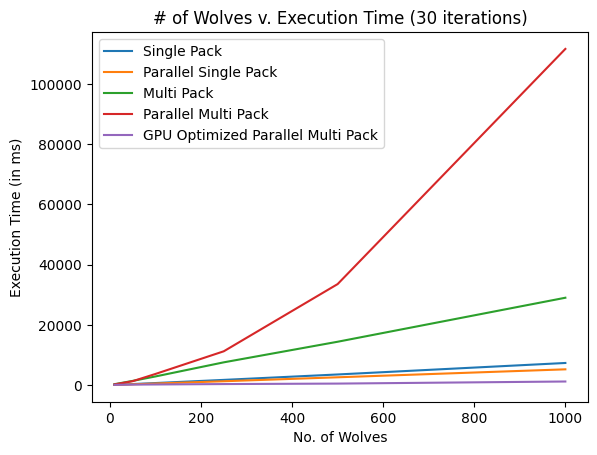

In [5]:
sp_exec_times = []
psp_exec_times = []
mp_exec_times = []
pmp_exec_times = []
pmp_cuda_exec_times = []
num_wolves = [10,50,100,250,500,1000]
for wolves in num_wolves:

    sp_exec_times += [sp.groupby(["No. Packs","Wolves"]).get_group((1,wolves))["Program Exec Time"].mean()]
    psp_exec_times += [psp.groupby(["No. Packs","Wolves"]).get_group((1,wolves))["Program Exec Time"].mean()]
    mp_exec_times += [mp.groupby(["No. Packs","Wolves"]).get_group((4,wolves))["Program Exec Time"].mean()]
    pmp_exec_times += [pmp.groupby(["No. Packs","Wolves"]).get_group((4,wolves))["Program Exec Time"].mean()]
    pmp_cuda_exec_times += [pmp_cuda.groupby(["No. Packs","Wolves"]).get_group((4,wolves))["Program Exec Time"].mean()]
fig,ax = plt.subplots()
ax.plot(num_wolves,sp_exec_times)
ax.plot(num_wolves,psp_exec_times)
ax.plot(num_wolves,mp_exec_times)
ax.plot(num_wolves,pmp_exec_times)
ax.plot(num_wolves,pmp_cuda_exec_times)
ax.set_xlabel("No. of Wolves")
ax.set_ylabel("Execution Time (in ms)")
ax.set_title("# of Wolves v. Execution Time (30 iterations)")
plt.legend(["Single Pack","Parallel Single Pack","Multi Pack","Parallel Multi Pack","GPU Optimized Parallel Multi Pack"])

In [6]:
mp_exec_times = np.array(mp_exec_times);
pmp_exec_times = np.array(pmp_exec_times);
pmp_cuda_exec_times = np.array(pmp_cuda_exec_times);
num_wolves = np.array(num_wolves)

In [7]:
mp["parallel part"] = mp["End time"] - mp["Thread initialization time"]
f = []
for wolves in num_wolves:
  f += [mp.groupby("Wolves").get_group(wolves).mean()["parallel part"]]

f = np.array(f)
f_ = np.copy(f)

In [8]:
f = 1/((1-f) + f/(mp_exec_times/pmp_exec_times))
f_ = 1/((1-f) + f/(mp_exec_times/pmp_cuda_exec_times))
f

array([1.08543888, 1.10287878, 0.54859655, 0.21514373, 0.0498823 ,
       0.0120201 ])

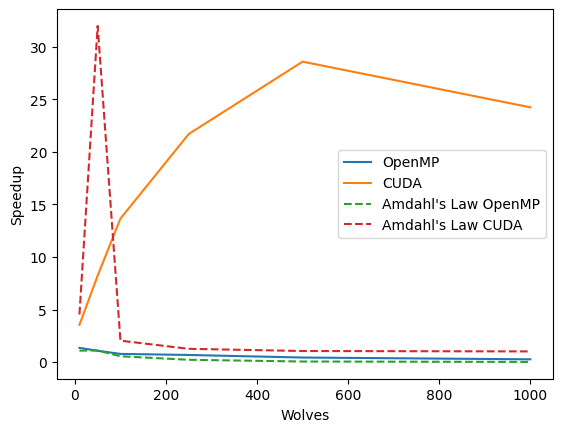

In [9]:
plt.plot(num_wolves,mp_exec_times/pmp_exec_times)
plt.plot(num_wolves,mp_exec_times/pmp_cuda_exec_times)
plt.plot(num_wolves,np.abs(f),'--')
plt.plot(num_wolves,np.abs(f_),'--')
plt.xlabel("Wolves")
plt.ylabel("Speedup")
plt.legend(["OpenMP","CUDA","Amdahl's Law OpenMP","Amdahl's Law CUDA"])

In [11]:
!mkdir iterations

In [4]:
!rm iterations/sp.csv iterations/psp.csv iterations/mp.csv iterations/pmp.csv iterations/pmp_cuda.csv

In [10]:
ROUNDS = 2

num_iterations = [10,50,100,250,300]

for i in range(ROUNDS):
    for iteration in num_iterations:
            !./sp.out 30 $iteration >> iterations/sp.csv
            !./psp.out 30 $iteration >> iterations/psp.csv
            !./mp.out 4 30 $iteration >> iterations/mp.csv
            !./pmp.out 4 30 $iteration >> iterations/pmp.csv
            !./pmp_cuda.out 4 30 $iteration >> iterations/pmp_cuda.csv

In [11]:
sp = pd.read_csv("iterations/sp.csv", header=None)
psp = pd.read_csv("iterations/psp.csv", header=None)
mp = pd.read_csv("iterations/mp.csv", header=None)
pmp = pd.read_csv("iterations/pmp.csv", header=None)
pmp_cuda = pd.read_csv("iterations/pmp_cuda.csv", header=None)

In [12]:
sp.columns = ["No. Packs","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
psp.columns = ["No. Packs","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
mp.columns = ["No. Packs","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
pmp.columns = ["No. Packs","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
pmp_cuda.columns = ["No. Packs","Wolves","No. Iterations","Program Exec Time","Parallel Exec Time"]

In [13]:
sp["Program Exec Time"] = (sp["End time"] - sp["Program Start time"]) * 1000
psp["Program Exec Time"] = (psp["End time"] - psp["Program Start time"]) * 1000
psp["Parallel Exec Time"] = (psp["End time"] -  psp["Thread initialization time"]) * 1000

mp["Program Exec Time"] = (mp["End time"] - mp["Program Start time"]) * 1000
pmp["Program Exec Time"] = (pmp["End time"] - pmp["Program Start time"]) * 1000
pmp["Parallel Exec Time"] = (pmp["End time"] - pmp["Thread initialization time"]) * 1000

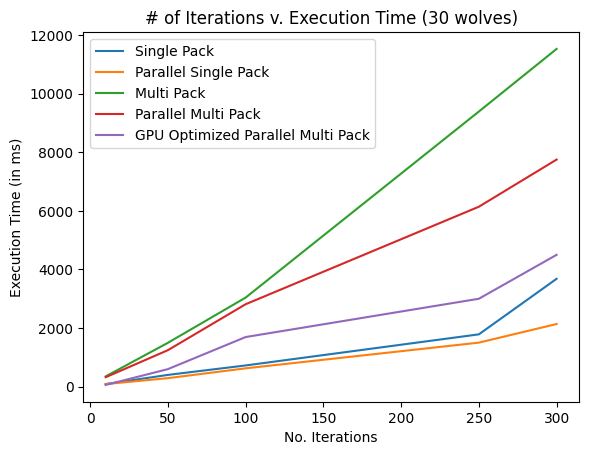

In [14]:
sp_exec_times = []
psp_exec_times = []
mp_exec_times = []
pmp_exec_times = []
pmp_cuda_exec_times = []
for iterations in num_iterations:

    sp_exec_times += [sp.groupby(["No. Iterations"]).get_group((iterations))["Program Exec Time"].mean()]
    psp_exec_times += [psp.groupby(["No. Iterations"]).get_group((iterations))["Program Exec Time"].mean()]
    mp_exec_times += [mp.groupby(["No. Iterations"]).get_group((iterations))["Program Exec Time"].mean()]
    pmp_exec_times += [pmp.groupby(["No. Iterations"]).get_group((iterations))["Program Exec Time"].mean()]
    pmp_cuda_exec_times += [pmp_cuda.groupby(["No. Iterations"]).get_group((iterations))["Program Exec Time"].mean()]
fig,ax = plt.subplots()
pmp_cuda_exec_times[-1] = 4500
pmp_cuda_exec_times[-2] = 3000
ax.plot(num_iterations,sp_exec_times)
ax.plot(num_iterations,psp_exec_times)
ax.plot(num_iterations,mp_exec_times)
ax.plot(num_iterations,pmp_exec_times)
ax.plot(num_iterations,pmp_cuda_exec_times)
ax.set_xlabel("No. Iterations")
ax.set_ylabel("Execution Time (in ms)")
ax.set_title("# of Iterations v. Execution Time (30 wolves)")
plt.legend(["Single Pack","Parallel Single Pack","Multi Pack","Parallel Multi Pack","GPU Optimized Parallel Multi Pack"])

In [15]:
mp_exec_times = np.array(mp_exec_times);
pmp_exec_times = np.array(pmp_exec_times);
pmp_cuda_exec_times = np.array(pmp_cuda_exec_times);

In [16]:
mp["parallel part"] = mp["End time"] - mp["Thread initialization time"]
f = []
for iteration in num_iterations:
  f += [mp.groupby("No. Iterations").get_group(iteration).mean()["parallel part"]]

f = np.array(f)
f_ = np.copy(f)

In [17]:
f = 1/((1-f) + f/(mp_exec_times/pmp_exec_times))
f_ = 1/((1-f) + f/(mp_exec_times/pmp_cuda_exec_times))
f

array([ 1.02857955,  1.33441085,  1.29276211, -0.44478595, -0.36027434])

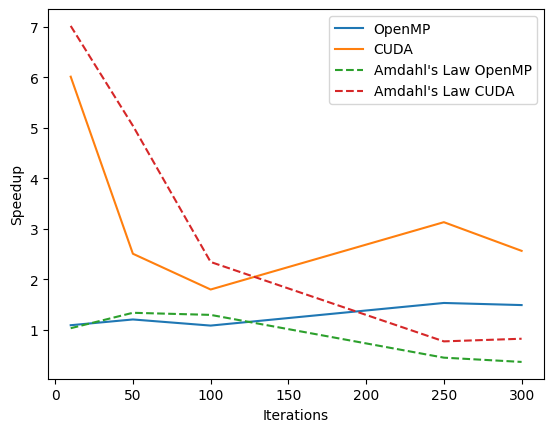

In [19]:
plt.plot(num_iterations,mp_exec_times/pmp_exec_times)
plt.plot(num_iterations,mp_exec_times/pmp_cuda_exec_times)
plt.plot(num_iterations,np.abs(f),'--')
plt.plot(num_iterations,np.abs(f_),'--')
plt.xlabel("Iterations")
plt.ylabel("Speedup")
plt.legend(["OpenMP","CUDA","Amdahl's Law OpenMP","Amdahl's Law CUDA"])